This is the linear regression exercise. First we will implement the algorithm from scratch. Then we will implement it using a widely used library in python- Scikit Learn

# Data preprocessing 

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
X , y = load_boston(return_X_y = True)
y = y.reshape(506,1)
print(X.shape, y.shape)

(506, 13) (506, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
mu = np.mean(X_train, axis= 0)
sigma = np.std(X_train, axis= 0)
X_train = (X_train-mu) / sigma
X_test = (X_test-mu)  / sigma


In [ ]:
m = y_train.shape[0]

def initialize_params(X):
  ones = np.ones((m,1))
  X_new = np.hstack((ones , X))
  theta = np.zeros((X_new.shape[1],1))
  return X_new , theta

In [ ]:
X_train, theta = initialize_params(X_train)

In [ ]:
def compute_cost(theta, X, y):

  J = 1/(2*m) * np.sum( ((X@theta-y))**2 )
  return J

In [ ]:
compute_cost(theta, X_train, y_train)

307.9009292035398

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
      J_history[i] = compute_cost(theta, X, y)
      theta = theta - (learning_rate/m) * X.T @ (X @ theta - y) 
        

    return (J_history, theta)

In [ ]:
(J_history, theta) = gradient_descent(X_train, y_train, theta, 0.1, 50)

In [ ]:
print(J_history)  #If all code is correct, you should expect your final cost value to be around 11.795

[[307.9009292 ]
 [240.75134671]
 [195.29896343]
 [159.97347194]
 [131.6648569 ]
 [108.83444813]
 [ 90.39390285]
 [ 75.49038842]
 [ 63.44065566]
 [ 53.69471527]
 [ 45.80928118]
 [ 39.426862  ]
 [ 34.25903464]
 [ 30.07301414]
 [ 26.680857  ]
 [ 23.93077521]
 [ 21.70014449]
 [ 19.88987325]
 [ 18.41986525]
 [ 17.22536211]
 [ 16.25399358]
 [ 15.46339798]
 [ 14.81930177]
 [ 14.29396917]
 [ 13.8649502 ]
 [ 13.51406944]
 [ 13.22660889]
 [ 12.99064766]
 [ 12.79652815]
 [ 12.6364245 ]
 [ 12.50399352]
 [ 12.39409246]
 [ 12.30255056]
 [ 12.22598433]
 [ 12.16164796]
 [ 12.10731229]
 [ 12.06116688]
 [ 12.02174058]
 [ 11.98783739]
 [ 11.95848436]
 [ 11.93288949]
 [ 11.91040756]
 [ 11.8905125 ]
 [ 11.87277493]
 [ 11.856844  ]
 [ 11.84243268]
 [ 11.82930579]
 [ 11.81727033]
 [ 11.8061676 ]
 [ 11.79586683]]


Text(0, 0.5, 'Cost')

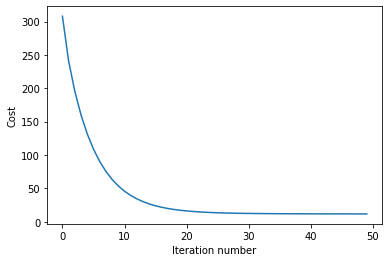

In [ ]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost')

In [ ]:
from sklearn.metrics import mean_squared_error
X_test = np.hstack((np.ones((X_test.shape[0],1)) , X_test))
y_pred = X_test @ theta
print(0.5 * mean_squared_error(y_pred, y_test))

11.059825219841013


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model =  LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yPred_train = linear_model.predict(X_train)
yPred_test = linear_model.predict(X_test)

In [ ]:
print("Training loss = " + str(0.5 * mean_squared_error(yPred_train, y_train)))
print("Test loss = " + str(0.5 * mean_squared_error(yPred_test, y_test)))

Training loss = 11.492507920150404
Test loss = 10.362011718669908
